In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns

In [140]:
data=pd.read_csv("Shopping_Revenue.csv")

In [141]:
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,6/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754
134,134,7/8/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634


In [142]:
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          133 non-null    float64
 11  P7          133 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [144]:
data=data.fillna(data.mean())

C:\Users\91721\AppData\Local\Temp\ipykernel_8852\2490576204.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data=data.fillna(data.mean())


In [145]:
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

<AxesSubplot:>

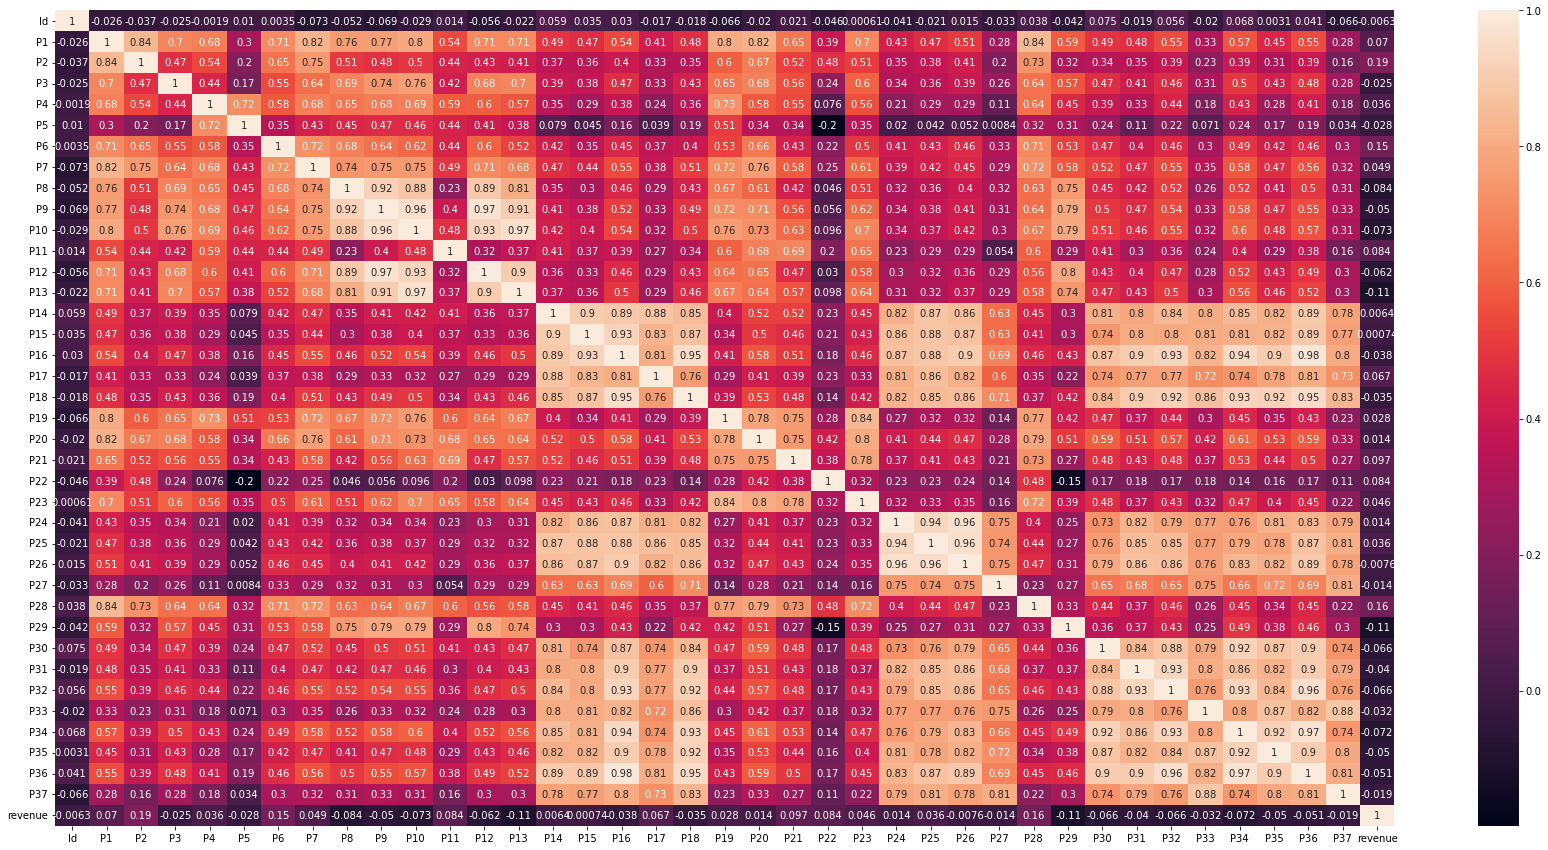

In [146]:
cor=data.corr()
plt.figure(figsize=(30,15))
sns.heatmap(cor,annot=True)

In [97]:
categorical_columns = ['City','City Group','Type']

In [98]:
data=data.drop("Open Date",axis=1)

In [99]:
X = data.drop('revenue', axis=1) 
y = data['revenue']

In [100]:
X_encoded = pd.get_dummies(X, columns=categorical_columns)

In [101]:
print("Encoded DataFrame:")
print(X_encoded.head())


Encoded DataFrame:
   Id  P1   P2   P3   P4  P5   P6    P7  P8  P9  ...  City_Trabzon  City_Uşak  \
0   0   4  5.0  4.0  4.0   2  2.0   5.0   4   5  ...             0          0   
1   1   4  5.0  4.0  4.0   1  2.0   5.0   5   5  ...             0          0   
2   2   2  4.0  2.0  5.0   2  3.0   5.0   5   5  ...             0          0   
3   3   6  4.5  6.0  6.0   4  4.0  10.0   8  10  ...             0          0   
4   4   3  4.0  3.0  4.0   2  2.0   5.0   5   5  ...             0          0   

   City_İstanbul  City_İzmir  City_Şanlıurfa  City Group_Big Cities  \
0              1           0               0                      1   
1              0           0               0                      1   
2              0           0               0                      0   
3              0           0               0                      0   
4              0           0               0                      0   

   City Group_Other  Type_DT  Type_FC  Type_IL  
0                 

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [130]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [131]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

In [132]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)


In [133]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

In [134]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_predictions = gb_model.predict(X_test_scaled)

In [135]:
def evaluate_model(predictions, model_name):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} Metrics:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("------------------------")

In [136]:
evaluate_model(lr_predictions, "Linear Regression")
evaluate_model(dt_predictions, "Decision Tree Regression")
evaluate_model(rf_predictions, "Random Forest Regression")
evaluate_model(gb_predictions, "Gradient Boosting Regression")

Linear Regression Metrics:
Mean Squared Error: 2.430511624386846e+38
R-squared: -1.986696064499092e+25
------------------------
Decision Tree Regression Metrics:
Mean Squared Error: 13057799111899.607
R-squared: -0.06734227667704062
------------------------
Random Forest Regression Metrics:
Mean Squared Error: 10388102502666.45
R-squared: 0.15087826971956886
------------------------
Gradient Boosting Regression Metrics:
Mean Squared Error: 11220964159948.537
R-squared: 0.08280029962502378
------------------------
